In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [2]:
df_tfidf = pd.read_csv("df_tfidf_v2.csv")

In [3]:
df_tfidf

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_378,tfidf_379,tfidf_380,tfidf_381,tfidf_382,tfidf_383,tfidf_384,tfidf_385,tfidf_386,tfidf_387
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.178793,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.208295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.548005,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [5]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [6]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [7]:
df_mlp = pd.concat([df_tfidf, df_no_lsa], axis = 1)

In [8]:
df_mlp.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

In [9]:
df_mlp

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [10]:
X = df_mlp.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_mlp[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [12]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [13]:
mlpreg = MLPRegressor(random_state=1, max_iter=500)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

In [14]:
mean_absolute_error(y_val, y_pred_mlp)

0.09368320183426215

In [15]:
mean_squared_error(y_val, y_pred_mlp)

0.022891509378557776

In [16]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.14481792344682817

In [17]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.37752321136458866

In [18]:
#val
r2_score(y_val, y_pred_mlp)

0.09577791755272921

Residual plots for each target variable

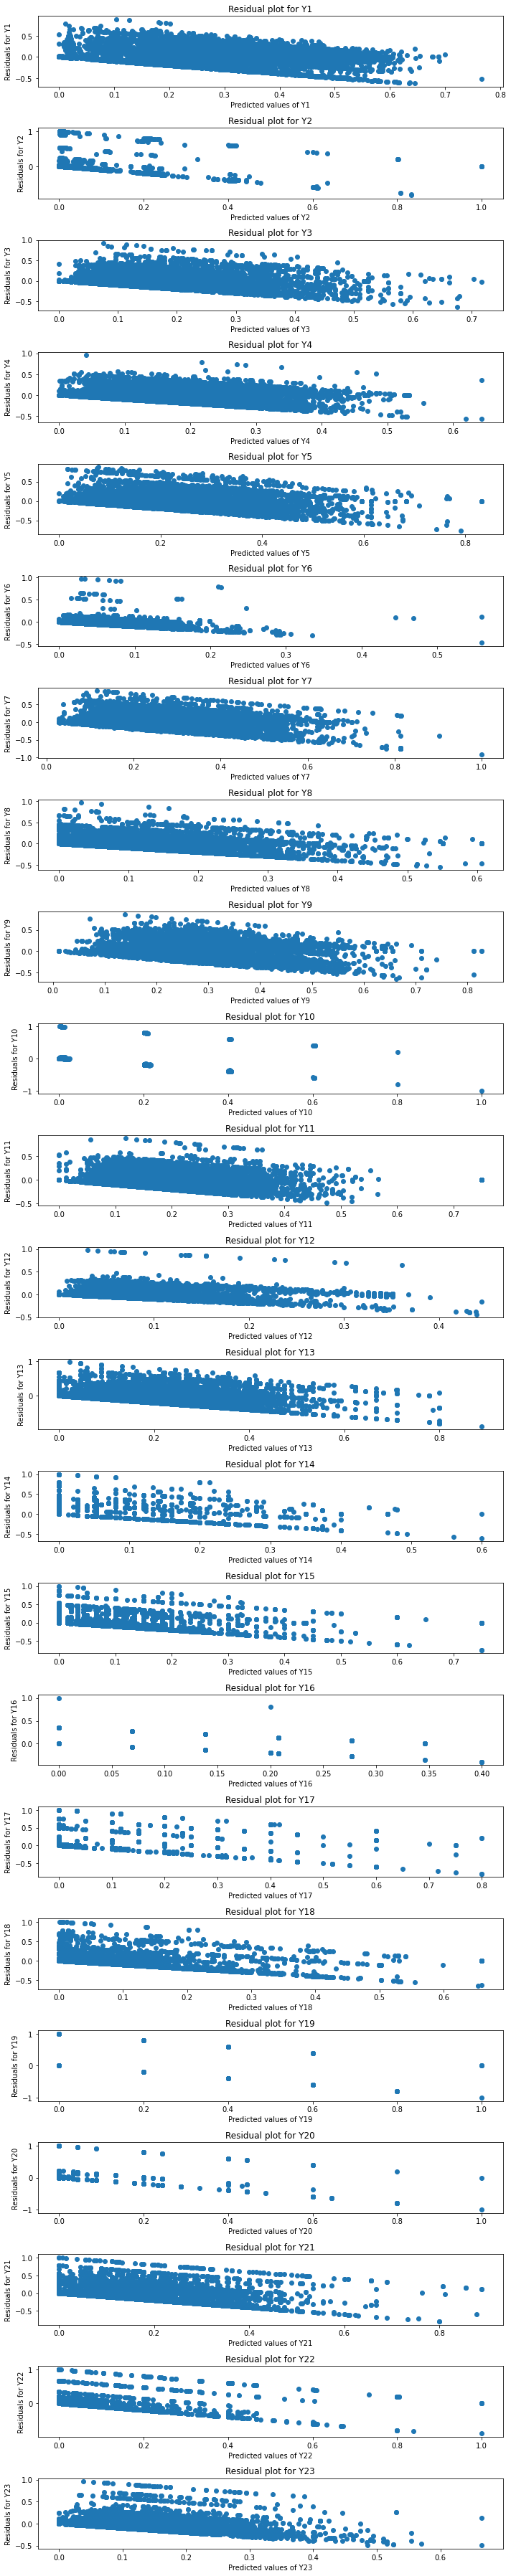

In [ ]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_mlp[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_mlp[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [19]:
rfreg = RandomForestRegressor()

In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [21]:
selector.estimator_.feature_importances_

array([1.06218535e-03, 1.44846820e-03, 1.13206818e-03, 1.09858664e-03,
       1.32142299e-03, 3.35032402e-03, 1.80964580e-03, 5.12255660e-03,
       6.59629742e-04, 1.98114154e-03, 9.39463579e-04, 4.74801910e-03,
       1.00561284e-03, 9.60204126e-04, 1.38297711e-03, 5.31724046e-04,
       1.48016147e-03, 2.00514718e-03, 9.13831026e-04, 1.45579957e-03,
       2.58567927e-03, 2.35068006e-03, 1.78155651e-03, 8.81551232e-04,
       9.39535341e-04, 9.89769913e-04, 2.37468042e-03, 9.72640815e-04,
       1.43445869e-03, 1.43187428e-03, 4.72404990e-03, 1.05650365e-03,
       1.84965036e-03, 9.87554482e-04, 2.14221557e-03, 2.92349730e-03,
       1.38940108e-03, 5.06322909e-03, 8.59405067e-04, 1.79694482e-03,
       6.52057129e-04, 1.23360311e-03, 6.73330100e-04, 4.61673815e-03,
       1.08338688e-03, 1.10437160e-03, 2.65147175e-03, 8.77547128e-04,
       2.21768962e-03, 8.62783293e-04, 8.75954280e-04, 9.57202815e-04,
       9.89531593e-04, 2.18709268e-03, 1.71540959e-03, 9.70871797e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_21,tfidf_26,tfidf_30,tfidf_34,tfidf_35,tfidf_37,...,mint,orange,pine,pungent,sage,skunk,strawberry,sweet,vanilla,woody
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,1,1,0
3,0.145484,0.0,0.000000,0.0,0.0,0.0,0.0,0.15591,0.213037,0.00000,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.0,0.165804,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
42973,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
42974,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
42975,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [27]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_20',
 'tfidf_21',
 'tfidf_26',
 'tfidf_30',
 'tfidf_34',
 'tfidf_35',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_48',
 'tfidf_53',
 'tfidf_73',
 'tfidf_78',
 'tfidf_93',
 'tfidf_96',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_117',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_129',
 'tfidf_130',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_189',
 'tfidf_190',
 'tfidf_199',
 'tfidf_200',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_217',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_272',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_289',
 'tfidf_291',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_325',
 'tfidf_329',

In [28]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf.pkl")
joblib.dump(selector, "selector_mlp_tfidf.pkl")
joblib.dump(rfreg, "rfreg_for_fs.pkl")

['rfreg_for_fs.pkl']

Train test split (after Feature Selection)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

In [32]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.09104629765194269

In [33]:
mean_squared_error(y_val, y_pred_mlpreg)

0.02186103161184483

In [34]:
mean_squared_error(y_val, y_pred_mlpreg, squared = False)

0.14167268307518893

In [35]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.19188184410572912

In [36]:
#val
r2_score(y_val, y_pred_mlpreg)

0.13109401297317652

Hyperparameter Tuning

In [37]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [38]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [39]:
rscv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=1),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [41]:
joblib.dump(rscv, "rscv_mlp_tfidf.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params.pkl")

['rscv_mlp_tfidf_best_params.pkl']

MLP fit (after hyperparameter tuning)

In [42]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 1000, hidden_layer_sizes=(50,50,50), activation = 'relu')
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

In [43]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.08941553627847827

In [44]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.021831864663100897

In [45]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.14149884482659586

In [46]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.21029187319684367

In [47]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.1341357281383856

Residual plots after Hyperparameter Tuning

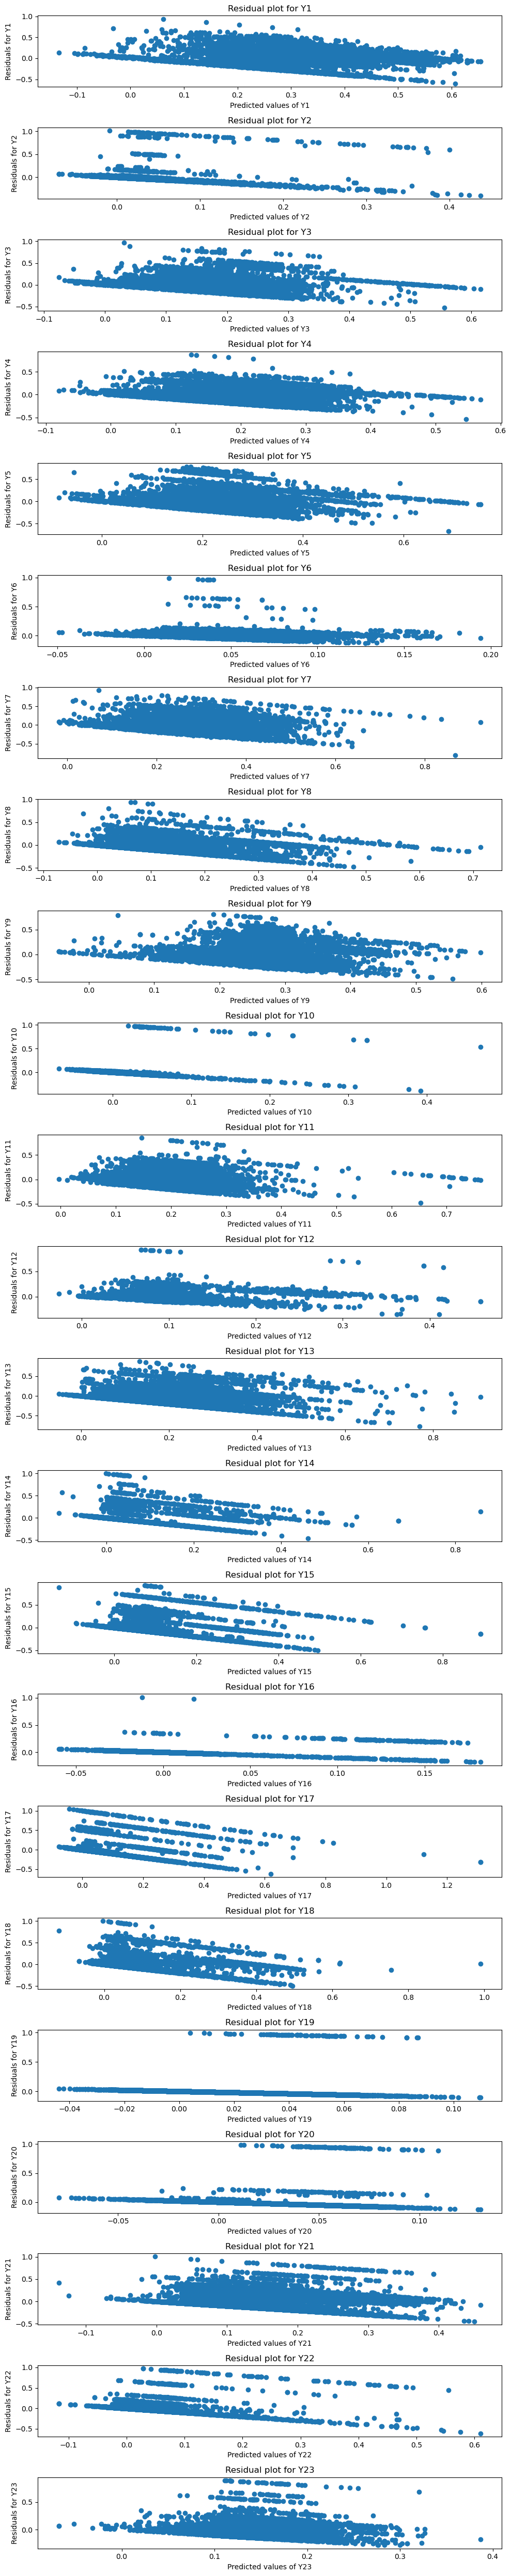

In [48]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_mlp_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_mlp_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [49]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [50]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf.pkl")

['y_test_mlpreg_tfidf.pkl']

In [51]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.08914534127477305

In [52]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.022018145859886585

In [53]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.14298447777044881

In [54]:
r2_score(y_test, y_pred_mlpreg_test)

0.1370255184966979

Error analysis

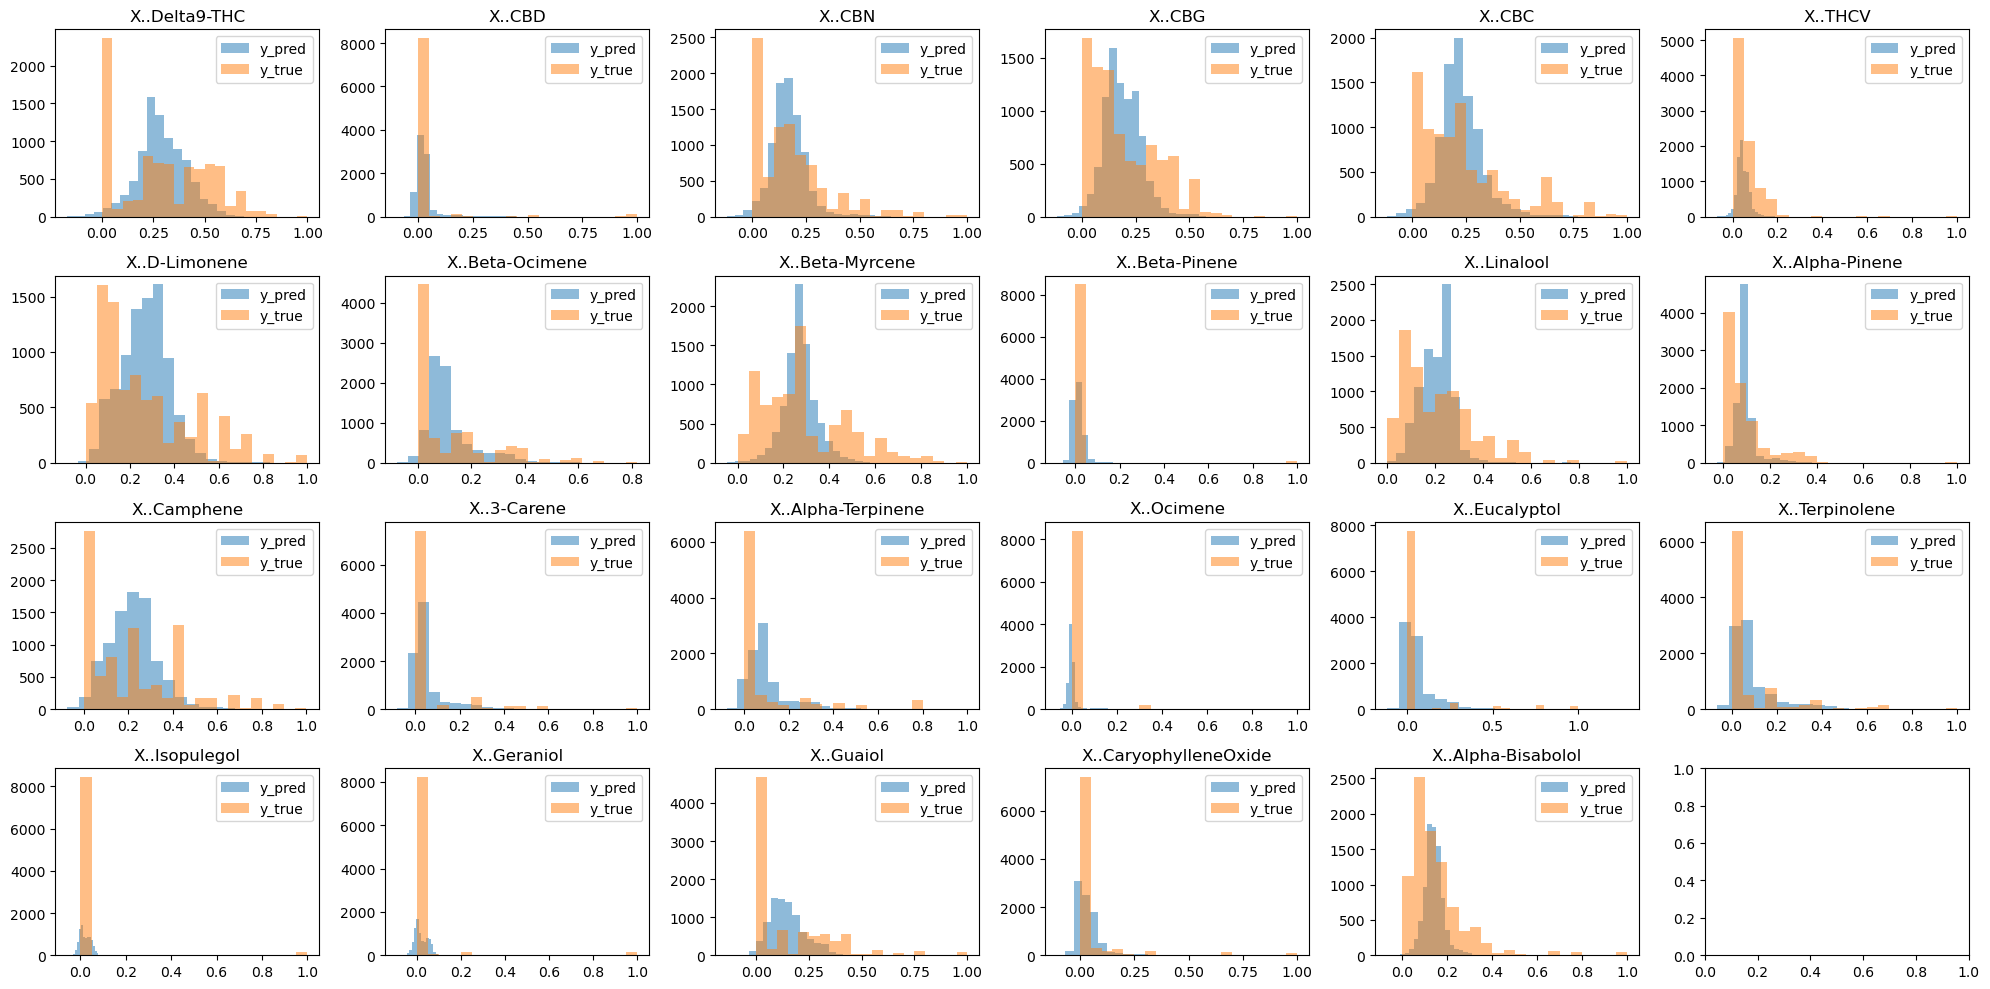

<Figure size 640x480 with 0 Axes>

In [55]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_mlpreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_mlp_tfidf.png')

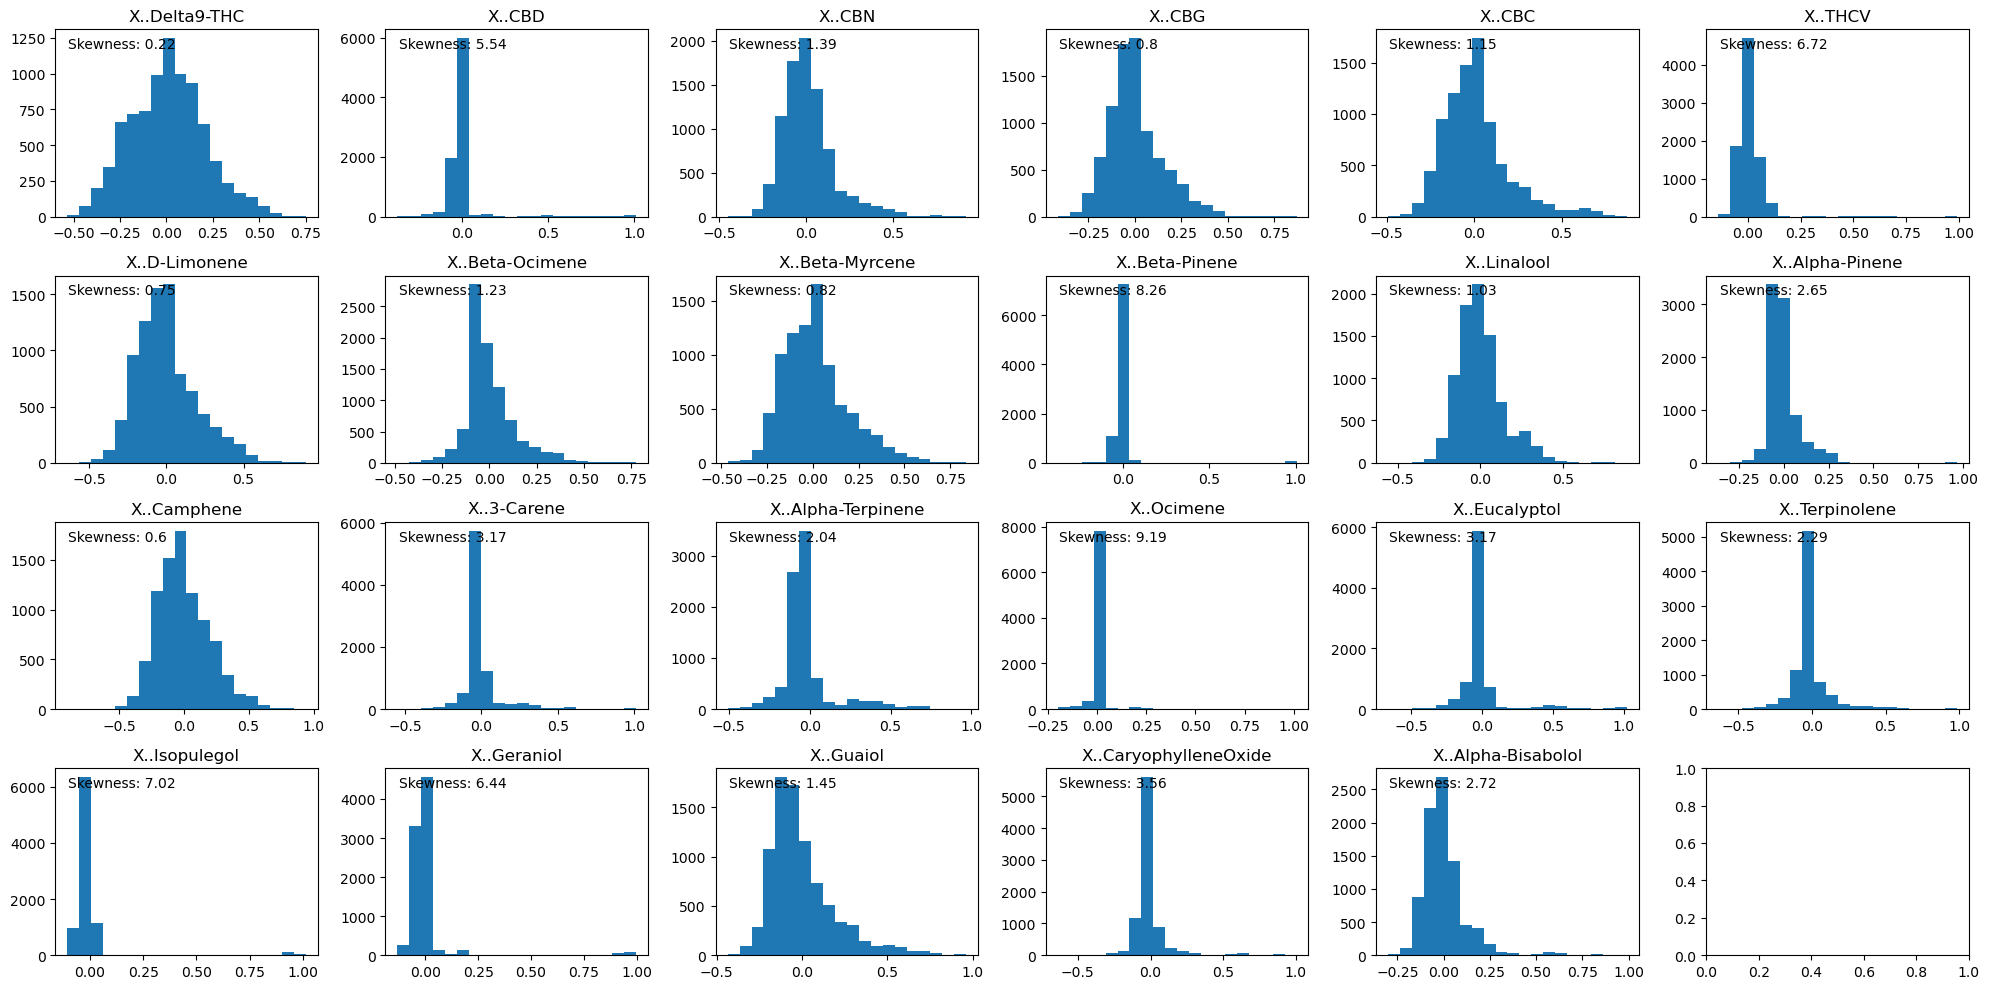

<Figure size 640x480 with 0 Axes>

In [56]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_mlpreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_mlp_tfidf.png')

In [57]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_mlpreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.44056846479438083, p-value=0.0
Target 1: Pearson correlation coefficient=0.32643149193999954, p-value=1.4249118780806384e-212
Target 2: Pearson correlation coefficient=0.4025084667749679, p-value=0.0
Target 3: Pearson correlation coefficient=0.43198650157464247, p-value=0.0
Target 4: Pearson correlation coefficient=0.41718105104896086, p-value=0.0
Target 5: Pearson correlation coefficient=0.3289318184255464, p-value=5.30509751474137e-216
Target 6: Pearson correlation coefficient=0.38761215681375877, p-value=3.351869444215044e-306
Target 7: Pearson correlation coefficient=0.5236572585138584, p-value=0.0
Target 8: Pearson correlation coefficient=0.32967533038024693, p-value=4.997332464272663e-217
Target 9: Pearson correlation coefficient=0.1990743001228464, p-value=1.4862020806474616e-77
Target 10: Pearson correlation coefficient=0.3906787810202529, p-value=1.874871738587e-311
Target 11: Pearson correlation coefficient=0.43697942350592944, p-va

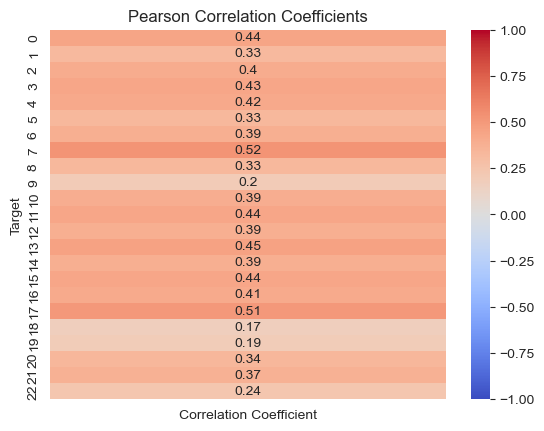

In [58]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_mlpreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_mlp_tfidf.png')